In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

train_df = pd.read_csv('/Users/asanedosivina/Downloads/Подгорный/train.csv') 
test_df = pd.read_csv('/Users/asanedosivina/Downloads/Подгорный/test.csv') 

train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
test_df = test_df[['Pclass', 'Sex', 'Age', 'Fare']]

train_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [12]:
#Вычисление пропущенных значений в каждой колонке в train_df
percent_missing_train = train_df.isnull().mean() * 100
percent_missing_train 

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [13]:
#Вычисление пропущенных значений в каждой колонке test_df
percent_missing_test = test_df.isnull().mean() * 100
percent_missing_test

Pclass     0.000000
Sex        0.000000
Age       20.574163
Fare       0.239234
dtype: float64

In [14]:
#Заполнение пропусков медианой
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [15]:
#Преобразование категориальных признаков
train_df = pd.get_dummies(train_df, columns=['Sex'])
test_df = pd.get_dummies(test_df, columns=['Sex'])

In [16]:
#Целевая переменная 
y_train = train_df['Survived']

#Признаки для обучения 
X_train = train_df.drop('Survived', axis=1)
X_test = test_df 

In [17]:
#Оучение модели дерева решений
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
results_df = test_df
results_df['Survived'] = predictions 

results_df

,Pclass,Age,Fare,Sex_female,Sex_male,Survived
0,3,34.5,7.8292,False,True,0
1,3,47.0,7.0000,True,False,1
2,2,62.0,9.6875,False,True,0
3,3,27.0,8.6625,False,True,0
4,3,22.0,12.2875,True,False,1
...,...,...,...,...,...,...
413,3,27.0,8.0500,False,True,0
414,1,39.0,108.9000,True,False,1
415,3,38.5,7.2500,False,True,0
416,3,27.0,8.0500,False,True,0


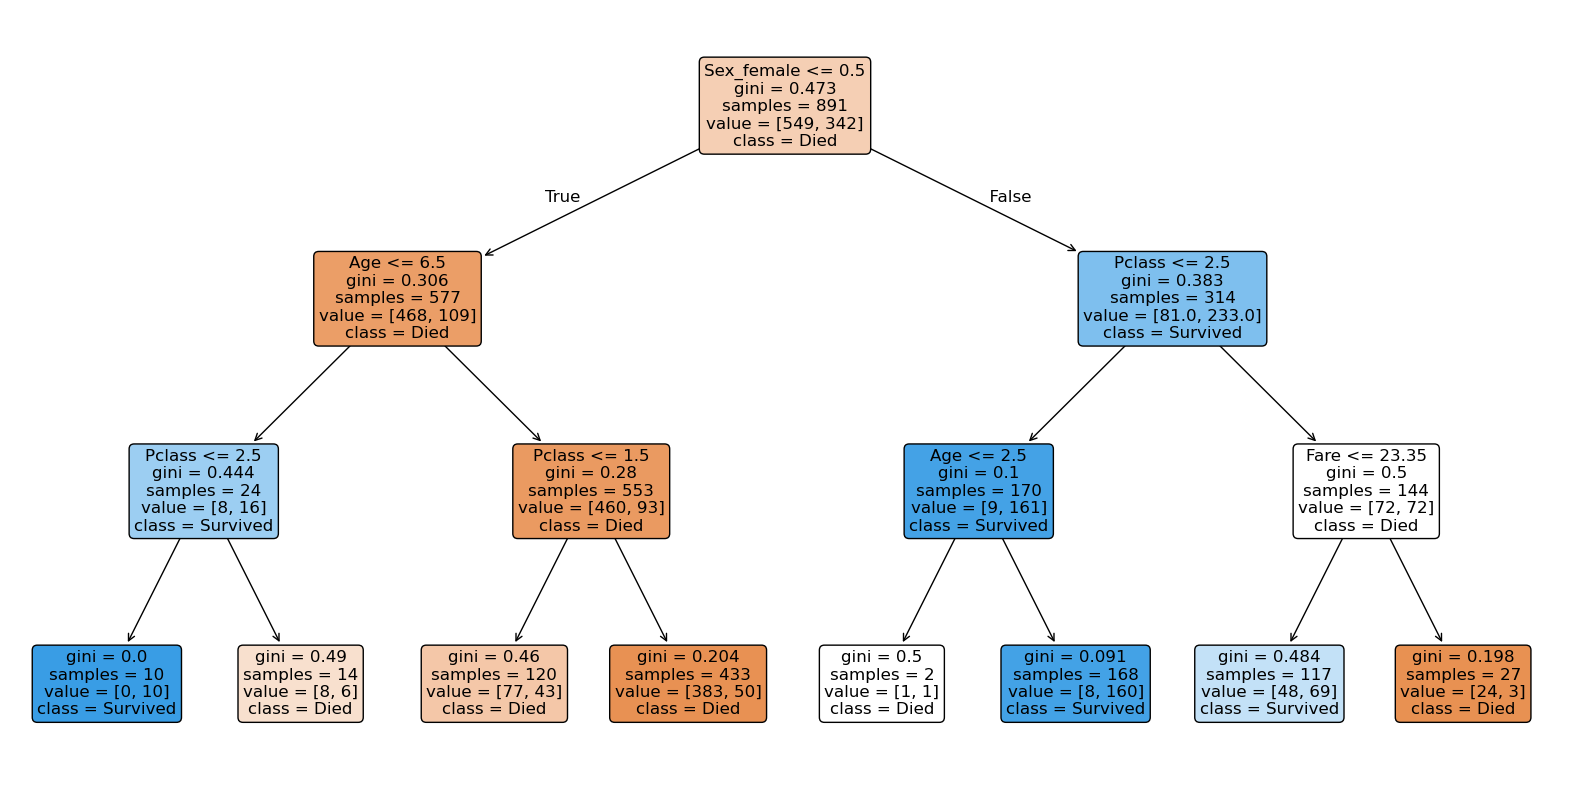

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))  # Настроим размер графика
plot_tree(model, 
          feature_names=X_train.columns,  # Имена признаков
          class_names=['Died', 'Survived'],  # Классы
          filled=True,  # Заполнение цветом для визуализации значений
          rounded=True,  # Скругленные углы
          fontsize=12)  # Размер шрифта
plt.show()